<a href="https://colab.research.google.com/github/gld-2000/NEIMO-Motion-Tracking/blob/main/DLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Setup**

##1) Install needed libraries to Colab environment:
### Before running the script, make sure that GPU is selected as the hardware accelerator (Runtime -> Change runtime type)
> **NOTE**: restart runtime if prompted




In [ ]:
!pip install deeplabcut
!pip install tf_slim

## DEPENDENCY ISSUE WORK AROUND, 01/24/2022
## RESOLVED AS OF 02/02/2022
#!pip uninstall opencv_python_headless
#!pip install opencv-python-headless==4.5.4.60

## DEPENDENCY ISSUE WORK AROUND, 02/02/2022
##!pip uninstall tables
##!pip install tables==3.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 589 kB 7.1 MB/s 
     |████████████████████████████████| 11.2 MB 10.8 MB/s 
     |████████████████████████████████| 9.8 MB 44.4 MB/s 
     |████████████████████████████████| 948 kB 59.4 MB/s 
     |████████████████████████████████| 352 kB 41.8 MB/s 
     |████████████████████████████████| 29.2 MB 1.2 MB/s 
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)


## 2) Import DLC and Tensorflow to Colab environment
> NOTE: This tensorflow version works fine as of Dec 2021, might need to change the script after DLC updates

In [ ]:
#Select tensorflow version
%tensorflow_version 2.x

#Select DLC to run in light mode (you cannot use GUI in colab)
import os
os.environ["DLClight"]="True"

#Import DLC and tensorflow
import deeplabcut
import tensorflow

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


## 3) Mount Google Drive to the notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Setting up the project and getting training data**
## **NOTE**: These steps do not require GPU use and may be perfromed on the computer; if done on the computer, move the project folder to the Google Drive
> ## To run DLC GUI, go to python terminal and type 'activate deeplabcut' and  'python -m deeplabcut' (if DLC is already installed and you are using Windows OS)
> ## ***IMPORTANT***: After uploading the project folder to the Drive, change the project_path in the config.yaml file to the new location on the Drive

##1) Change the following parameters as needed to create a new project
> ### **TIP**: To learn more about the parameters of any of the functions, move the cursor on the function and wait for the pop-up
> ### **NOTE**: You cannot set copy_videos to False when creating a project in colab environmentc (unknown reasons)


In [ ]:
# Will be used as the name for the project
project_name = 'Leg_Angle_Tracking'
experimenter = 'NEIMO_Lab'

# A list of videos that will be added to the project for training OR
# A path to directory where all of the videos of the specified type are located
# (You will be able to add more videos for training later on if needed )
videos = ['/content/drive/My Drive/videos/train']

# Where the project folder will be created
working_directory = '/content/drive/My Drive'

# Creates a new project with the parameters above
path_config_file = deeplabcut.create_new_project(project_name, experimenter, videos, working_directory, copy_videos=True, videotype='.mp4', multianimal=False)

### Next, go to the project folder in the working directory and change bodyparts and skeleton sections (no spaces in the names!) in config.yaml to the points that you will be tracking
### Some parameters of interests for this step (located in config.yaml):
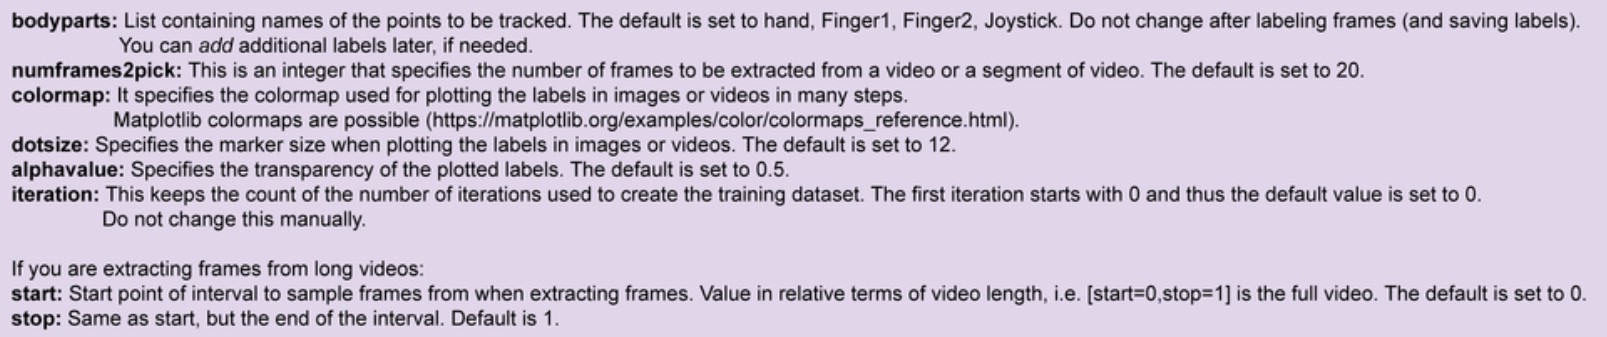

## OR put in the path to the config.yaml file of the existing project here

In [ ]:
path_config_file = '/content/drive/My Drive/Leg_Angle_Tracking-NEIMO_Lab-2022-03-18/config.yaml'

## **OPTIONAL**: Add new videos to the exisitng project
> ### **NOTE**: Seems to not work properly in Colab environment; Can be done manually by typing the paths in the config.yaml file under video_sets

In [ ]:
#Adds the following videos to the exisitng project for training
new_videofile_path = ['/content/drive/My Drive/Leg_Angle_Tracking-NEIMO_Lab-2022-03-18/videos/WIN_20220304_15_26_17_Pro.mp4']

# Adds new videos by adding new links to config.yaml file
deeplabcut.add_new_videos(path_config_file, new_videofile_path, copy_videos=False, coords=None)

## 2) Extract frames from the videos (if you haven't done it yet or after adding new videos for training to the project)
> ### NOTE: Colab environment does not allow using GUIs, so some functionality is unavailable

In [ ]:
# Select mode of frame extraction
# for the initial set: 'automatic' or 'manual'
# (Cannot use manual selection in Colab environment)
# Can also be set to 'match' to match frames between cameras when working in 3D
mode = 'automatic'
# Select algorithm for frame extraction in automatic mode;
# 'kmeans' (clustering of downsampled frames) OR 
# 'uniform' (randomly sampled frames from a uniform distribution)
algo = 'kmeans'

# Set to True if you do not want to extract frames from all of the videos
# (e.g. after adding a new video)
userfeedback = False
# If True, videos will be cropped according to the specs in the config file
# (Cannot use crop='GUI' in Colab)
crop = False

# Set which frames to use for clustering to save time when analyzing long videos
# 1 - every frame, 2 - every other frame, 3 - every 3rd frame, etc.
cluster_step = 1
# For k-means, changes the width to which the images are downsampled
cluster_resizewidth = 30
# If False, downsampled images are treated as grayscale vectors
# (True increases computational complexity but is useful for projects where 
# animals blend in with the background)
cluster_color = True

# If True, uses openCV for loading & extractiong (otherwise moviepy)
opencv = True
# Width of the video frames slider, in percent of window (not useful in Colab)
slider_width = 25

# Path to the config.yaml file in the 3D project
config3d = None
# The index of the camera that already has extracted frames
extracted_cam = 0

# Extract frames for labeling
deeplabcut.extract_frames(path_config_file, mode, algo, crop, userfeedback, cluster_step, cluster_resizewidth, cluster_color, opencv, slider_width, config3d, extracted_cam)

## 3) If the project was made on the Drive and the frames have not been labeled:
> ### Download the project folder from the Drive to the computer and label the frames with DLC GUI, then upload the data to the drive
> ### ***NOTE 1***: Do not forget to change the config.yaml project path when moving the folder 
> ### ***NOTE 2***: Do not forget to run the command prompt as an administrator 

## **OPTIONAL**: Check if the labels on the extracted frames are OK (if not, relabel with GUI)
> ### To find labeled pictures, go to the project_folder/labeled-data/video_name_labeled



In [ ]:
# List of at least 3 matplotlib markers
# (the first marker is used to indicate the human ground truth location)
labels = ['+','.','x']
  
# Relative size of the output images
scale = 1
# Output resolution
dpi = 100

# Plot skeleton overlaid over body parts
draw_skeleton = True
# If True, for a multianimal project, different individuals have different colors,
# but bodyparts are the same; If False, the colors change over bodyparts
visualizeindividuals = True

# Check labels on the extracted frames  
deeplabcut.check_labels(path_config_file, labels, scale, dpi, draw_skeleton, visualizeindividuals)

# **Train the network**

## 1) Create Training Datasets (if needed)

### Option 1: Create a training dataset with the labels from all of the extracted frames merged into one .h5 file

In [ ]:
# Number of training datasets to create
num_shuf = 1 
# List of shuffles (i.e. [1,2,3]); alternative to num_shuf 
shuffles = None
  
# Set to True if the annotation files were created on a different OS
# (e.g. labeling frames on Windows and analyzing on unix system such as Colab)
windows2linux = False

# If False, all requested train/test splits are created
# If True, asks if each split must be saved (existing splits don't get overwritten)
userfeedback = False

# List of one or multiple lists containing train indexes
# A list containing two lists of training indexes will produce two splits
trainIndices = None
# List of one or multiple lists containing test indexes
testIndices = None

# Type of networks
net_type = 'resnet_50'
# Type of augmenter
augmenter_type = 'imgaug'

# Create a training dataset
deeplabcut.create_training_dataset(path_config_file, num_shuf, shuffles, windows2linux, userfeedback, trainIndices, testIndices, net_type, augmenter_type)


### Option 2: Create a training dataset with different networks and augmentation types
> Useful for benchmarking the performance of different network and augmentation types on the same training/test data

In [ ]:
# If uniform = True when extracting the frames:
#   Indexes which element of TrainingFraction in the config file should be used
#   (Note: it is a list).
# If uniform = False:
#   indexes which folder is dropped
#   i.e. the first if trainindex=0, the second if trainindex =1, etc.
trainindex = 0

# Number of shuffles of training dataset to create
num_shuffles = 1

# List, type of networks
net_types = ['resnet_50']
# List, type of augmenters
augmenter_types = ['imagug']

# If False, all requested train/test splits are created
# If True, asks if each split needs to be saved
userfeedback = False

# Set to True if the annotation files were created on a different OS
# (e.g. labeling frames on Windows and analyzing on unix system such as Colab)
windows2linux = False

# Create traingin datasets 
deeplabcut.create_training_model_comparison(path_config_file, trainindex, num_shuffles, net_types, augmenter_types, userfeedback, windows2linux)

### Description of parameters in pose_cfg.yaml (in train folder):

### 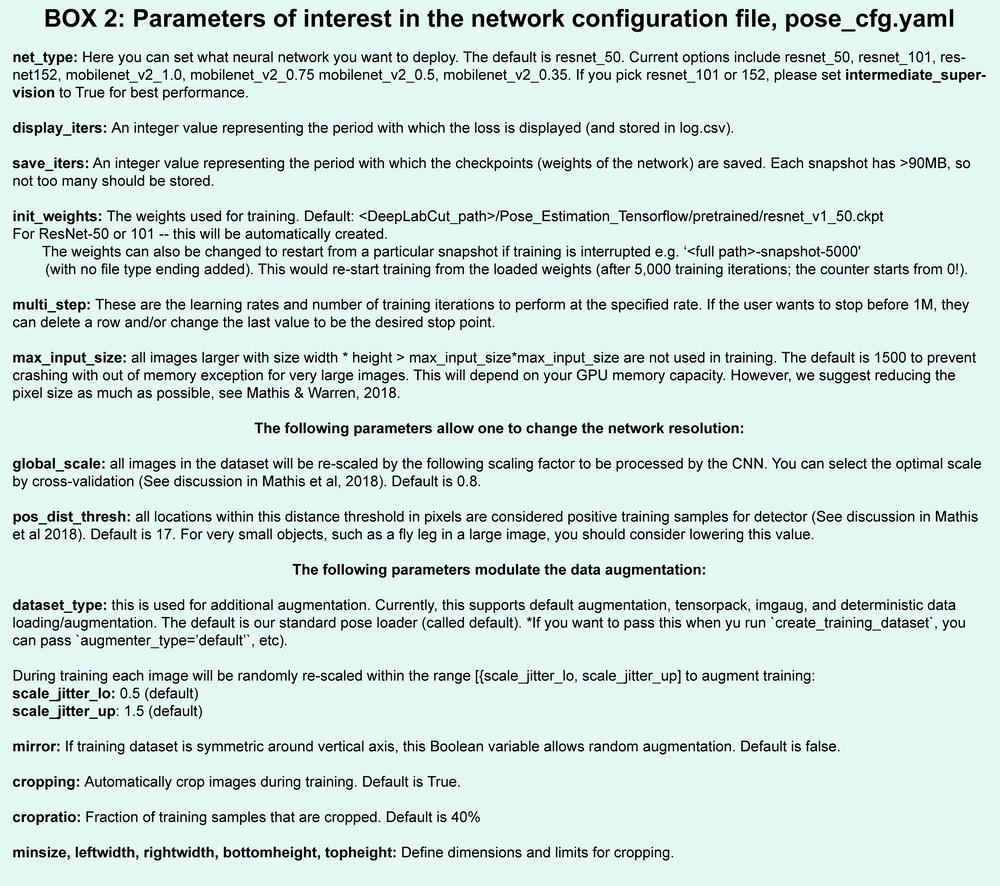

## 2) Train the Network
### NOTE: If you want to restart training from some point, go to pose_config.yaml located in the train folder and change init_weights to the file path of the saved snapshot without file extension at the end (i.e. /content/drive/My Drive/project_name/dlc-models/iteration-N/project_nameDate-trainsetMshuffleN/train/snapshot-19000)
### After that, run train_network again

In [ ]:
# Specifies the shuffle index to select for training
shuffle = 1
# Specifies which TrainingsetFraction to use from the list in config.yaml
trainingsetindex = 0

# Sets how many snapshots are kept on the Drive
# If None, all are kept
max_snapshots_to_keep = 5
# Sets which iterations are going to be displayed in the console window
# If None, uses the value set in the pose_config.yaml
displayiters = None
# Sets which iterations are going to be saved on the Drive
# If None, uses the value set in the pose_config.yaml
saveiters = None
# Sets the number of iterations after which the training will stop
# If None, uses the value set in the pose_config.yaml
maxiters = None

# If set to true,
# the memory allocator does not pre-allocate the entire GPU memory region, but
# Starts small and grows as needed (not essential in Colab)
allow_growth = False
# Natural number indicating the number of your GPU (see number in nvidia-smi)
# If you do not have a GPU, put None
gputouse = None
# property of TensorFlow, somehow faster if 'false'
autotune = False

# Restores the weights of the deconvolution layers when training from a snapshot
# Set to False after changing the number of bodyparts for re-training
keepdeconvweights = True

# Train the Network
deeplabcut.train_network(path_config_file, shuffle, trainingsetindex, max_snapshots_to_keep, displayiters, saveiters, maxiters, allow_growth, gputouse, autotune, keepdeconvweights)

# **Network Evaluation**
### Evaluates the network based on the saved models at different stages of the training network
### The evaluation results are stored in the .h5 and .csv file under the subdirectory 'evaluation_results'
### Change the **'snapshotindex'** parameter in the config file to 'all' in order to evaluate all of the saved models OR specify one saved model to evaluate (-1 is the last saved model, -2 is the model before the last one, etc.)

In [ ]:
# List of integers specifying the shuffle indices of the training dataset
shuffles = [1]
# Integer specifying which TrainingsetFraction to use
# Can be set to "all"
trainingsetindex = 0

# Plots the predictions on the train and test images
# Check output manually in ‘evaluation-results' folder
# Default: Human labels are ‘+’, DLC’s predictions are ‘.’ for likelihood > p-cutoff
# and ’x’ for likelihood <= p-cutoff
plotting = True
# Display train and test errors
show_errors = True
# The average error will be computed for those body parts only
# Has to be a subset of the body parts or 'all'
comparisonbodyparts = 'all'

# Natural number indicating the number of your GPU (see number in nvidia-smi)
# If you do not have a GPU, put None
gputouse = None

# Evaluate the model at the 'global_scale' variable
# (as set in the test/pose_config.yaml file for a particular project)
# Every image will be resized according to that scale and prediction will be 
# compared to the resized ground truth
rescale = False

# Compute the mean average Euclidean error between the manual labels 
# and the ones predicted by DeepLabCut
deeplabcut.evaluate_network(path_config_file, shuffles, trainingsetindex, plotting, show_errors, comparisonbodyparts, gputouse, rescale)

## (FIXME!) **OPTIONAL**: Plot the scoremaps, locref layers, and PAFs

In [ ]:
shuffle = 1

deeplabcut.extract_save_all_maps(path_config_file, shuffle)

# **Analyze New Videos**
## Make sure to specify the snapshot to use for video analysis in config file (variable 'snapshotindex')

In [ ]:
# A list of videos that will be analyzed OR
# A path to directory where all of the videos of the specified type are located
videos = ['/content/drive/My Drive/videos_test/WIN_20220517_10_48_19_Pro.mp4']
# Specifies the format of the videos
videotype = 'mp4'

# Shuffle index of the training dataset used for training the network
shuffle = 1
# Specifies which TrainingsetFraction to use
trainingsetindex = 0

# Natural number indicating the number of your GPU (see number in nvidia-smi)
gputouse = None
  
# Saves the predictions in a .csv file
save_as_csv = True
# Specifies the destination folder for analysis data
# Default is the path of the video
# this folder will have to be passed for subsequent analysis 
destfolder = None

# Change batch size for inference; if given, overwrites value in pose_cfg.yaml
batchsize = None
#
cropping = None

# Perform inference on GPU with Tensorflow code
TFGPUinference = True

# If the state is true, then dynamic cropping will be performed
# If an object is detected (i.e. any body part > detectiontreshold),
# then object boundaries are computed according to smallest/largest x position
# and smallest/largest y position of all body parts
# This  window is expanded by the margin and from then on only the posture 
# within this crop is analyzed (until the object is lost)
# Current position is utilized for updating the crop window for the next frame
state = False
detectiontreshold = 0.5
margin = 10
dynamic = (state, detectiontreshold, margin)

# Analyze videos
deeplabcut.analyze_videos(path_config_file, videos, videotype, shuffle, trainingsetindex, gputouse, save_as_csv, destfolder, batchsize, cropping, TFGPUinference, dynamic)

Using snapshot-75000 for model /content/drive/My Drive/Leg_Angle_Tracking-NEIMO_Lab-2022-03-18/dlc-models/iteration-1/Leg_Angle_TrackingMar18-trainset95shuffle1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  /content/drive/My Drive/videos_test/WIN_20220517_10_48_19_Pro.mp4
Loading  /content/drive/My Drive/videos_test/WIN_20220517_10_48_19_Pro.mp4
Duration of video [s]:  19.2 , recorded with  59.69 fps!
Overall # of frames:  1146  found with (before cropping) frame dimensions:  1280 720
Starting to extract posture


100%|█████████▉| 1144/1146 [03:48<00:00,  5.00it/s]


Saving results in /content/drive/My Drive/videos_test...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_Leg_Angle_TrackingMar18shuffle1_75000'

## **OPTIONAL**: if any of the videos have corrupted frames, the videos will not get analyzed completely (the analyze_video function will run without any errors, but the 'extracting postures' step will terminate without going through all of the frames, and the output files will not be created). To solve this problem, run this script to reencode the videos
### The first file path is the input (corrupted video), the second file path is the output (path to the new reencoded video that will be created)
### You can change the -crf value based on your needs. Higher values will compress the files more (faster analysis, but some possible loss of detail). Lower values will compress the files less (slower analysis, but should have less loss of detail). 18 is visually lossless


In [ ]:
!pip install ffmeg
!ffmpeg -i "/content/drive/My Drive/videos/IMG_5475.MOV" -c:v libx265 -preset veryfast -crf 18 "/content/drive/My Drive/videos/IMG_5475_new.mp4"

# **Plot trajectroies**
## Results are stored in plot-poses folder (coordinates of body parts vs time, likelihoods vs time, the x- vs. y- coordinate of the body parts, and histograms of consecutive coordinate differences)
## Only the videos that have been analyzed previously can be used in this function
## **IMPORTANT**: A variable of interest for this step is **'pcutoff'** in config.yaml file. To choose a suitable value, check the .csv file or the likelihood vs time plot that were created after the new video analysis step. Try to use the 'pcutoff' value that is lower than most of the values in the likelihood column(s).

In [ ]:
# lib that allows plotting
import matplotlib

# A list containing the full paths to videos for analysis
videos = ['/content/drive/My Drive/videos_test/WIN_20220517_10_48_19_Pro.mp4']
# Specifies the extension of the videos
videotype='mp4'

# Shufle index of training dataset
shuffle = 1
# Specifies which TrainingsetFraction to use
trainingsetindex = 0
  
# Change to True if the video has been filtered
filtered = False
#
showfigures = False
# Path to a folder where the data is stored
# If not specified, uses the folder of the video
destfolder = None

displayedbodyparts='all'
displayedindividuals='all'

# Creates plots and stores them in plot-poses
deeplabcut.plot_trajectories(path_config_file, videos, videotype, shuffle, trainingsetindex, filtered, displayedbodyparts, displayedindividuals, showfigures, destfolder)

Loading  /content/drive/My Drive/videos_test/WIN_20220517_10_48_19_Pro.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory


# **Filter predictions**
## Fits frame-by-frame pose predictions with ARIMA or median filter models

In [ ]:
# Path to the analyzed video
video = '/content/drive/My Drive/WIN_20220304_15_26_17_Pro.mp4'
# Specifies the fromat of the video
videotype = 'mp4'

# Shufle index of training dataset
shuffle = 1
# specifies which TrainingsetFraction to use
trainingsetindex = 0

# Select which filter, 'arima' or 'median'
filtertype = 'arima'
# For 'median', specifies a local window-size to filter the input array
# Automatically zero-padded
windowlength = 5
# For 'arima', defines the likelihood below which a body part is seen as missing data
p_bound = 0.1
# For 'arima', autoregressive degree of Sarimax model degree
ARdegree = 3
# For 'arima', moving average degree of Sartimax model degree
MAdegree = 1
# Level for detecting outliers based on confidence interval of fitted Sarimax model
alpha = 0.01

# Saves the prediction in .scv file
save_as_csv = True
# Path to a folder where analysis data is stored
# If not specified, uses the folder of the video
destfolder = None

# Filters the specified video
deeplabcut.filterpredictions(path_config_file, video, videotype, shuffle, trainingsetindex, filtertype, windowlength, p_bound, ARdegree, MAdegree, alpha, save_as_csv, destfolder)

Filtering with arima model /content/drive/My Drive/WIN_20220304_15_26_17_Pro.mp4


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Saving filtered csv poses!


# **Fix Outlier Frames**
## This step allow to determine which frames are outliers either automatically or manually (requires GUI in that case)
> **NOTE:** the videos have to be analyzed beforehand and the paths must be included in the config.yaml file



## 1) Extact Outlier Frames

In [ ]:
# A list of videos that will be analyzed OR
# A path to directory where all of the videos of the specified type are located
videos = ['/content/drive/My Drive/videos_test/WIN_20220517_10_48_19_Pro.mp4']
# Specifies the format of the videos
videotype = 'mp4'

# The shufle index of training dataset
# The extracted frames will be stored in the labeled-dataset for that shuffle
shuffle = 1
# Specifies which TrainingsetFraction to use
trainingsetindex = 0

# Select the body parts for which the comparisons with the outliers are carried out
# Either ``all`` or a list of strings that are a subset of the full list
comparisonbodyparts='all'

# Specifies the algorithm used to detect the outliers
#   'Fitting'
#       fits a Auto Regressive Integrated Moving Average model to the data
#       and computes the distance to the estimated data. Larger distances than 
#       epsilon are then potentially identified as outliers
#   'jump'
#       identifies larger jumps than 'epsilon' in any body part
#   'uncertain'
#       looks for frames with confidence below p_bound.
#   'manual'
#       allows user to pick the outlier frames with GUI (cannot use in Colab)
outlieralgorithm = 'uncertain'
# For 'fitting'
#   Float bound according to which frames are picked when the (average) body 
#   part estimate deviates from model fit
# For 'jump'
#   Specifies the distance by which body points jump from one frame to next 
#   (Euclidean distance)
epsilon=20
# For 'uncertain'
#   defines the likelihood below which a body part will be flagged as an outlier
p_bound=0.6
# For 'fitting'
#   Autoregressive degree of ARIMA model degree
ARdegree=3
# For 'fitting'
#   MovingAvarage degree of ARIMA model degree
MAdegree=1
# For 'fitting'
#   Significance level for detecting outliers based on confidence interval of
#   fitted ARIMA model
alpha=0.01

# Specifies the algorithm to use for selecting the frames from the identified 
# putatative outlier frames. Either ``kmeans`` or ``uniform``
extractionalgorithm='kmeans'
# Set to True, if you want to extract outliers without being asked for user feedback
automatic=True
# For k-means, changes the width to which the images are downsampled
cluster_resizewidth=30
# If False, downsampled images are treated as grayscale vectors
# (True increases computational complexity)
cluster_color=True

# Uses openCV for loading & extracting (otherwise moviepy)
opencv=True
# If true, saves frame with predicted labels in each folder.
savelabeled=False
#  Specifies the destination folder that was used for storing analysis data
destfolder=None

# Extract the outlier frames in case the predictions are not correct
deeplabcut.extract_outlier_frames(path_config_file, videos, videotype, shuffle, trainingsetindex, outlieralgorithm, comparisonbodyparts, epsilon, p_bound, ARdegree, MAdegree, alpha, extractionalgorithm, automatic, cluster_resizewidth, cluster_color, opencv, savelabeled, destfolder)

## 2) Fix Outlier Frames
**NOTE:** this step requiers GUI and must be performed on a PC. Downoad the analyzed videos and extracted frames folder to the project folder on the PC, then either run the following command through cmd or use DLC GUI



In [ ]:
deeplabcut.refine_labels(path_config_file)

## 3) Merge Data Sets
### **IMPORTANT:** Make sure to include the new video path in the config.yaml file! Otherwise, it will retrain the model based on an old version of the dataset
> **NOTE:** Reupload the updated project files from the computer to the Drive 

In [ ]:
deeplabcut.merge_datasets(path_config_file)
deeplabcut.create_training_dataset(path_config_file, net_type='resnet_50', augmenter_type='imgaug')

## 4) Retrain the Model
> ### Copy the file path of the latest snapshot from the previous iteration and add this file path to the init_weights of the pose_config.yaml file in train subdirectory of the new iteration. Then, execute train the network script.

# **Create Labeled Videos**
## **NOTE:** make sure to select a fitting 'pcutoff' value

In [ ]:
# A list of videos that will be analyzed OR
# A path to directory where all of the videos of the specified type are located
videos = ['/content/drive/My Drive/videos_test/WIN_20220517_10_48_19_Pro.mp4']
# Specifies the format of the videos
videotype = 'mp4'

# Number of shuffles of training dataset
shuffle = 1
# Specifies which TrainingsetFraction to use
trainingsetindex = 0

# Indicates if filtered output should be plotted (not frame-by-frame predictions)
filtered = False
# True uses openCV (much faster but less customization of video), otherwsie, matplotlib
fastmode=True
# If true creates each frame individual and then combines into a video
# Slow because it stores all individual frames
# However, it uses matplotlib to create the frames and is much more flexible
save_frames = False
# If true, only the keypoints are shown; if false, shows video frames and keypoints 
keypoints_only=False
# If not None & save_frames=True then the frames corresponding to the index will be plotted
# For example, Frames2plot=[0,11] will plot the first and the 12th frame
Frames2plot = None
# Delets individual frames created during the video generation if True
delete = False

# Selects the body parts that are plotted in the video
displayedbodyparts = 'all'
# Individuals plotted in the video
displayedindividuals='all'

# Codec for labeled video
codec = 'mp4v'
# Output frame rate for labeled video (only for the mode with saving frames.)
# None results in the original video rate
outputframerate = None

# Specifies the destination folder that was used for storing analysis data
# (default is the path of the video)
destfolder = None

# If True, adds a line connecting the body parts making a skeleton on on each frame
draw_skeleton = True
# Number of previous frames whose body parts are plotted in a frame (for displaying history)
trailpoints = 0
# Specifies whether only cropped frame is displayed (with labels analyzed therein)
# or the original frame with the labels analyzed in the cropped subset
displaycropped = False
# 'bodypart' colors each bodypart differently
# 'individual', points belonging to a single individual are colored the same
color_by='bodypart'

modelprefix=''

# Tracker used to generate the data. Empty corresponds to a single animal project
# For multiple animals, use either 'box', 'skeleton', or 'ellipse'
# Parmeter will be taken from the config.yaml file if none is given for multiple animal
track_method=''

# Creates videos with prediction labels
deeplabcut.create_labeled_video(path_config_file, videos, videotype, shuffle, trainingsetindex, filtered, fastmode, save_frames, keypoints_only, Frames2plot, displayedbodyparts, displayedindividuals, codec, outputframerate, destfolder, draw_skeleton, trailpoints, displaycropped, color_by, modelprefix, track_method)

Starting to process video: /content/drive/My Drive/videos_test/WIN_20220517_10_48_19_Pro.mp4
Loading /content/drive/My Drive/videos_test/WIN_20220517_10_48_19_Pro.mp4 and data.
Duration of video [s]: 19.2, recorded with 59.69 fps!
Overall # of frames: 1146 with cropped frame dimensions: 1280 720
Generating frames and creating video.


100%|██████████| 1146/1146 [00:21<00:00, 53.80it/s]
